In [1]:
from tensorflow_privacy.privacy.analysis import rdp_accountant, gdp_accountant
from tensorflow_privacy.privacy.analysis.rdp_accountant import compute_rdp
from compute_rdp_general import compute_epsilon

import prv_accountant
import prv_accountant.other_accountants as oa
import prv_accountant.accountant as pa
import prv_accountant.privacy_random_variables as prvs
# from prv_accountant import PRVAccountant
# from prv_accountant import PoissonSubsampledGaussianMechanism
import numpy as np
import matplotlib.pyplot as plt
sampling_probability = 1e-3
noise_multiplier = 0.8
delta = 1e-7
num_compositions = 2000

# prv = prvs.PoissonSubsampledGaussianMechanism(
#         sampling_probability=sampling_probability,
#         noise_multiplier=noise_multiplier)

# prv_acc = pa.PRVAccountant(
#     prvs=prv,
#     max_self_compositions=num_compositions,
#     eps_error=0.1,
#     delta_error=delta/1000)

# # rdp_acc = other_accountants.RDP(prvs=[prv])
# rdp_acc = oa.RDP(prvs=[prv])

nlist_gopi = np.unique(np.logspace(0,np.log10(2e3), dtype = int))

# #Do FFT

# eps_lower = []; eps_upper = []
# for nn in nlist_gopi:
#     eps_l , eps, eps_u = prv_acc.compute_epsilon(delta=delta, num_self_compositions= [nn])
#     eps_lower.append(eps_l)
#     eps_upper.append(eps_u)

# #Do RDP

# rdp_eps_lower = []; rdp_eps_upper = []; rdp_eps = []
# for nn in nlist_gopi:
#     rdp_eps_l , rdp_eps_t, rdp_eps_u = rdp_acc.compute_epsilon(delta=delta, num_self_compositions= [nn])
#     rdp_eps.append(rdp_eps_t)
#     rdp_eps_lower.append(rdp_eps_l)
#     rdp_eps_upper.append(rdp_eps_u)


# Do moments accountant
from tensorflow_privacy.privacy.analysis.rdp_accountant import compute_rdp
from tensorflow_privacy.privacy.analysis.rdp_accountant import get_privacy_spent

def compute_epsilon(steps,orders,rdp_array,delta):
  rdp_array = rdp_array*np.array(steps)
  return get_privacy_spent(orders, rdp_array, target_delta=delta)[0]

orders = [1 + x / 10. for x in range(1, 600)]
rdp_g = compute_rdp(q=sampling_probability,
                    noise_multiplier=noise_multiplier,
                    steps=1,
                    orders=orders)
ma_eps=[]
for nn in nlist_gopi:
    ma_eps.append(compute_epsilon(nn,orders,rdp_g,delta)) 

#Do GDP

def compute_eps_gdp(steps):
    batch_size = 1000 #?? wtf is this
    n = batch_size/sampling_probability
    epoch = steps*sampling_probability
    eps = gdp_accountant.compute_eps_poisson(epoch, noise_multiplier, n, batch_size, delta)
    return 0.0, eps, float('inf')
  
gdp_eps = [] 
for nn in nlist_gopi:
    _, gdp_eps_true, _ = compute_eps_gdp(nn)
    gdp_eps.append(gdp_eps_true)


ModuleNotFoundError: No module named 'prv_accountant.other_accountants'

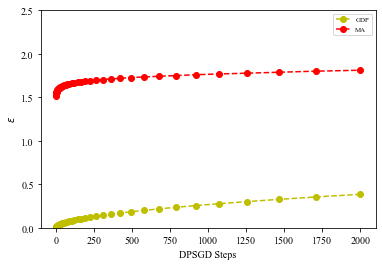

In [5]:
#plot them 

# plt.plot(nlist_gopi, eps_lower, '--gx', label = 'Gopi')
# plt.plot(nlist_gopi, eps_upper, '--go')
# plt.plot(nlist_gopi, rdp_eps, '--yo', label = 'RDP')
plt.plot(nlist_gopi, gdp_eps, '--yo', label = 'GDP')
plt.plot(nlist_gopi, ma_eps, '--ro', label = 'MA')
plt.legend(fontsize="x-small"); plt.xlabel('DPSGD Steps'); plt.ylabel('$\epsilon$'); plt.ylim([0,2.5]);